In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
#使绘图内嵌到notebook中
%matplotlib inline

In [2]:
close_px_all = pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)

In [3]:
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


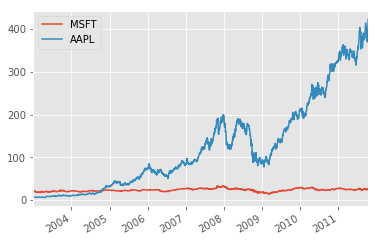

In [4]:
close_px_all.plot(y=['MSFT', 'AAPL'], kind='line')

In [5]:
type(close_px_all.index)

pandas.tseries.index.DatetimeIndex

In [6]:
'''在读取表格的时候，已经将时间的数据转换为DatetimeIndex对象了,并作为DataFrame的index'''
'''现在可以取出每个时间的year属性值'''
close_px_all.index.year

array([2003, 2003, 2003, ..., 2011, 2011, 2011])

In [7]:
'''根据年份对数据进行汇总，统计每年股票的平均价格'''
meanPrice = close_px_all.groupby(close_px_all.index.year).mean()
meanPrice

,AAPL,MSFT,XOM,SPX
2003,9.272619,20.595119,30.211111,965.227540
2004,17.763889,21.850437,38.875437,1130.649444
2005,46.675952,23.072421,51.045476,1207.229444
2006,70.810637,23.759363,58.458406,1310.461633
2007,128.273904,27.904422,75.767131,1477.184343
2008,141.979012,24.760593,76.525968,1220.042055
2009,146.814127,21.885397,67.124960,948.046389
2010,259.842460,26.262619,63.067976,1139.965516
2011,356.526834,25.825930,79.042663,1276.093015


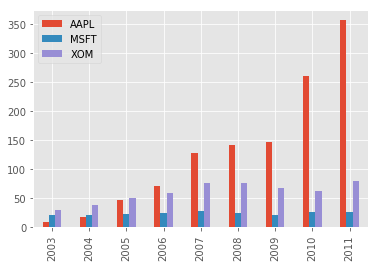

In [8]:
meanPrice.plot(kind='bar', y=['AAPL', 'MSFT', 'XOM'])

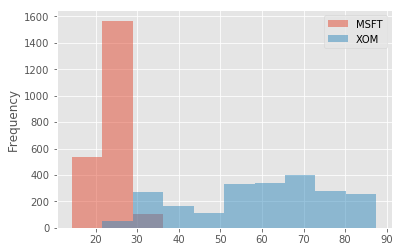

In [9]:
close_px_all.plot(y=['MSFT', 'XOM'], kind='hist', alpha=0.5)

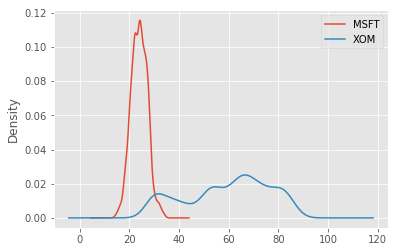

In [10]:
close_px_all.plot(y=['MSFT', 'XOM'], kind='kde')

In [11]:
close_px_all.index.year.dtype

dtype('int32')

In [12]:
year2010 = close_px_all.ix[close_px_all.index.year==2010]

In [13]:
year2010_month_mean = year2010.groupby(year2010.index.month).mean()
year2010_month_mean

,AAPL,MSFT,XOM,SPX
1,207.715263,28.984737,65.132632,1123.581579
2,198.795789,27.323158,62.924211,1089.160000
3,223.410870,28.261304,64.142174,1152.048696
4,251.148571,29.483333,65.895714,1197.316190
5,251.461500,27.210500,61.044000,1125.062000
6,261.145455,24.665000,58.866818,1083.360909
7,254.950000,24.327619,57.171905,1079.803333
8,251.323182,24.035000,58.885909,1087.282273
9,273.850952,23.990000,59.808571,1122.081905
10,300.934286,24.564286,63.524762,1171.583810


In [14]:
year2010_rate = year2010_month_mean / year2010_month_mean.sum()
year2010_rate

,AAPL,MSFT,XOM,SPX
1,0.066837,0.091866,0.086061,0.082183
2,0.063967,0.086600,0.083143,0.079665
3,0.071887,0.089573,0.084752,0.084265
4,0.080812,0.093446,0.087069,0.087576
5,0.080913,0.086242,0.080659,0.082291
6,0.084029,0.078175,0.077782,0.079241
7,0.082035,0.077105,0.075542,0.078981
8,0.080868,0.076178,0.077807,0.079528
9,0.088117,0.076035,0.079026,0.082073
10,0.096832,0.077855,0.083937,0.085694


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AA07DA0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B732A90>], dtype=object)

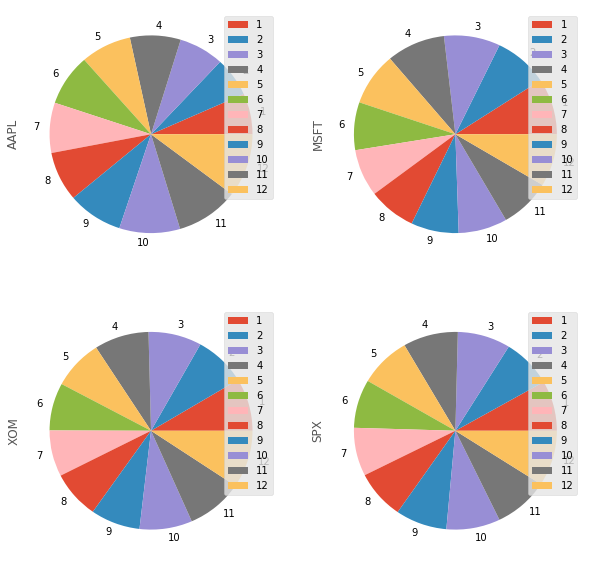

In [15]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
ax_list = [ax[0,0], ax[0,1], ax[1,0], ax[1,1]]
year2010_rate.plot( kind='pie', ax=ax_list, subplots=True)

In [16]:
iris = pd.read_csv('iris.csv')

In [17]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
iris['class'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

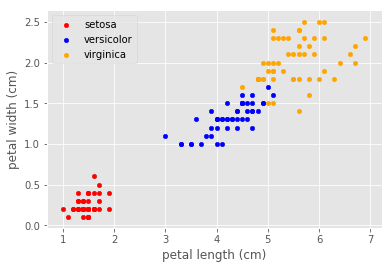

In [19]:
ax = iris[iris['class']=='setosa'].plot(x='petal length (cm)', y='petal width (cm)', kind='scatter', c='red', ax=None, label='setosa')
iris[iris['class']=='versicolor'].plot(x='petal length (cm)', y='petal width (cm)', kind='scatter', c='blue' , ax=ax, label='versicolor')
iris[iris['class']=='virginica'].plot(x='petal length (cm)', y='petal width (cm)', kind='scatter', c='orange', ax=ax, label='virginica')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CE80940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E68A4E0>]], dtype=object)

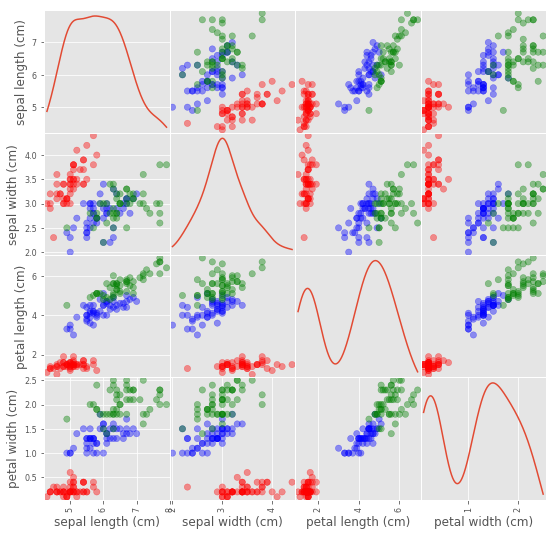

In [20]:
color = {'setosa':'red', 'versicolor':'blue', 'virginica':'green'}
pd.scatter_matrix(iris.iloc[:,:-1], figsize=(9, 9), diagonal='kde', marker='o', s=40, alpha=.4, c=iris['class'].apply(lambda x: color[x]))

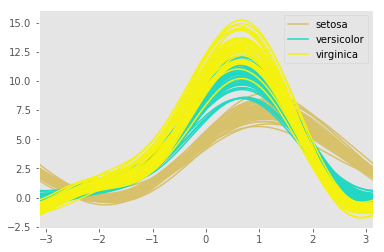

In [21]:
from pandas.tools.plotting import andrews_curves
andrews_curves(iris, 'class')

In [22]:
help(andrews_curves)

Help on function andrews_curves in module pandas.tools.plotting:

andrews_curves(*args, **kwargs)
    Generates a matplotlib plot of Andrews curves, for visualising clusters of
    multivariate data.
    
    Andrews curves have the functional form:
    
    f(t) = x_1/sqrt(2) + x_2 sin(t) + x_3 cos(t) +
           x_4 sin(2t) + x_5 cos(2t) + ...
    
    Where x coefficients correspond to the values of each dimension and t is
    linearly spaced between -pi and +pi. Each row of frame then corresponds to
    a single curve.
    
    Parameters:
    -----------
    frame : DataFrame
        Data to be plotted, preferably normalized to (0.0, 1.0)
    class_column : Name of the column containing class names
    ax : matplotlib axes object, default None
    samples : Number of points to plot in each curve
    color: list or tuple, optional
        Colors to use for the different classes
    colormap : str or matplotlib colormap object, default None
        Colormap to select colors from. I

# 客流量数据可视化

In [23]:
shop_payNum = pd.read_csv('shop_payNum_new.csv', encoding='gbk', index_col=0, parse_dates=True)

In [24]:
shop_payNum.head()

,shop_id,pay_num,cate_2_name
time_stamp,,,
2016-01-01,14,33,fast food
2016-01-02,14,35,fast food
2016-01-03,14,20,fast food
2016-01-04,14,53,fast food
2016-01-05,14,54,fast food
